In [46]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from utils.visualization_utils import get_dict

Using TensorFlow backend.


In [107]:
annotations_test = json.load(open("data/VRD/annotations_train.json"))

In [108]:
vocab_dir = os.path.join('data/VRD')
predicate_dict, obj_subj_dict = get_dict(vocab_dir)

In [163]:
def get_score(i, j, vec, eps=10e-8):
    current_vec = np.array([i-5, j-5])
    current_vec = current_vec/(np.linalg.norm(current_vec)+eps)
    vec = vec/(np.linalg.norm(vec)+eps)
    score = vec.dot(current_vec)
    return score

In [164]:
def get_filter(vec, filter_size=10):
    filter_template = np.zeros((1, filter_size,filter_size))
    for i in range(filter_size):
        for j in range(filter_size):
            if i != j:
                filter_template[0, i, j] = get_score(i, j, vec)
    return filter_template

In [165]:
def get_vec(s_bbox, o_bbox):
    s_center = ((s_bbox[0]+s_bbox[1])/2., (s_bbox[2]+s_bbox[3])/2.)
    o_center = ((o_bbox[0]+o_bbox[1])/2., (o_bbox[2]+o_bbox[3])/2.)
    vec = np.array([o_center[0]-s_center[0], o_center[1]-s_center[1]])
    return vec

In [166]:
print(' | '.join(predicate_dict))

on | wear | has | next to | sleep next to | sit next to | stand next to | park next | walk next to | above | behind | stand behind | sit behind | park behind | in the front of | under | stand under | sit under | near | walk to | walk | walk past | in | below | beside | walk beside | over | hold | by | beneath | with | on the top of | on the left of | on the right of | sit on | ride | carry | look | stand on | use | at | attach to | cover | touch | watch | against | inside | adjacent to | across | contain | drive | drive on | taller than | eat | park on | lying on | pull | talk | lean on | fly | face | play with | sleep on | outside of | rest on | follow | hit | feed | kick | skate on


number of examples for predicate 'walk next to': 5


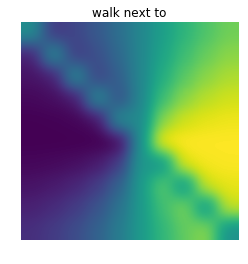

In [172]:
predicate = 'walk next to'
predicate_id = predicate_dict.index(predicate)
conv_filters = []
for img in annotations_test.keys():
    for rel in annotations_test[img]:
        if rel["predicate"]==predicate_id:
            s_bbox = rel["subject"]["bbox"]
            o_bbox = rel["object"]["bbox"]
            vec = get_vec(s_bbox, o_bbox)
            conv_filters += [get_filter(vec)]
print("number of examples for predicate '{}': {}".format(predicate, len(conv_filters)))
conv_filters = np.concatenate(conv_filters, axis=0)
interp_method = 'gaussian'
plt.imshow(conv_filters.mean(axis=0), interpolation=interp_method)
plt.axis("off")
plt.title(predicate)
plt.show()